# Travelling Salesman Problem : Djibouti (38 Cities)

In [31]:
#Import required packages
import pandas as pd
import matplotlib.pyplot as plt
import mlrose

In [32]:
#set desktop or system path
import sys
sys.path.append('C:\\DCHAVAN\\DSTI-Masters\\Curriculum\\2020\\Metaheuristics\\Assignment\\Project\\DataTSP')

In [33]:
#Uploaded CSV file
dj_cities = pd.read_csv("dj38.csv",encoding="iso-8859-1")

In [34]:
dj_cities.head(10)

,id,a,b
0,1,11003.6111,42102.5000
1,2,11108.6111,42373.8889
2,3,11133.3333,42885.8333
3,4,11155.8333,42712.5000
4,5,11183.3333,42933.3333
5,6,11297.5000,42853.3333
6,7,11310.2778,42929.4444
7,8,11416.6667,42983.3333
8,9,11423.8889,43000.2778
9,10,11438.3333,42057.2222


In [35]:
dj_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      38 non-null     int64  
 1   a       38 non-null     float64
 2   b       38 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.0 KB


In [36]:
#Shape of the data frame - 38 cities
dj_cities.shape

(38, 3)

In [11]:
# Need to Create a matrix of city coordinates
dj_cities_coord = dj_cities[['a','b']].values.tolist()
print(dj_cities_coord)

[[11003.6111, 42102.5], [11108.6111, 42373.8889], [11133.3333, 42885.8333], [11155.8333, 42712.5], [11183.3333, 42933.3333], [11297.5, 42853.3333], [11310.2778, 42929.4444], [11416.6667, 42983.3333], [11423.8889, 43000.2778], [11438.3333, 42057.2222], [11461.1111, 43252.7778], [11485.5556, 43187.2222], [11503.0556, 42855.2778], [11511.3889, 42106.3889], [11522.2222, 42841.9444], [11569.4444, 43136.6667], [11583.3333, 43150.0], [11595.0, 43148.0556], [11600.0, 43150.0], [11690.5556, 42686.6667], [11715.8333, 41836.1111], [11751.1111, 42814.4444], [11770.2778, 42651.9444], [11785.2778, 42884.4444], [11822.7778, 42673.6111], [11846.9444, 42660.5556], [11963.0556, 43290.5556], [11973.0556, 43026.1111], [12058.3333, 42195.5556], [12149.4444, 42477.5], [12286.9444, 43355.5556], [12300.0, 42433.3333], [12355.8333, 43156.3889], [12363.3333, 43189.1667], [12372.7778, 42711.3889], [12386.6667, 43334.7222], [12421.6667, 42895.5556], [12645.0, 42973.3333]]


In [12]:
# Initialize function parameters --
population=500
cities_cnt = int(len(dj_cities_coord))
print(cities_cnt)

38


In [13]:
# Need to initialize fitness function object
fitness_coords = mlrose.TravellingSales(coords=dj_cities_coord)

In [14]:
#Need to define an Optimization Problem Object with TSPOpt() - For Dijbouti 38 cities
problem_fit = mlrose.TSPOpt(length=38,fitness_fn=fitness_coords,maximize=False)

## Approach1

In [16]:
# To solve Randomised Optimization Algorithm - using the genetic algorithm
best_state, best_fitness, fit_curve = mlrose.genetic_alg(problem=problem_fit,
                                                             pop_size=500,
                                                             mutation_prob=0.1,
                                                             max_attempts=100,
                                                             max_iters=1000,
                                                             curve=True)

In [20]:
print(best_state)

[14  7 10 35 30 19  8 15 11 37 34 23 22 21 32 27 26  0  1  5 13 33 31 29
 12 17 18  2  6 28 20  9 25 36  3  4 16 24]


In [21]:
print(best_fitness)

20281.22482697737


In [25]:
print(fit_curve)

[-22658.98188205 -22539.46249771 -22367.11424945 -20788.30432433
 -20788.30432433 -20788.30432433 -20788.30432433 -20788.30432433
 -20788.30432433 -20788.30432433 -20788.30432433 -20788.30432433
 -20788.30432433 -20788.30432433 -20788.30432433 -20788.30432433
 -20788.30432433 -20788.30432433 -20788.30432433 -20281.22482698
 -20281.22482698 -20281.22482698 -20281.22482698 -20281.22482698
 -20281.22482698 -20281.22482698 -20281.22482698 -20281.22482698
 -20281.22482698 -20281.22482698 -20281.22482698 -20281.22482698
 -20281.22482698 -20281.22482698 -20281.22482698 -20281.22482698
 -20281.22482698 -20281.22482698 -20281.22482698 -20281.22482698
 -20281.22482698 -20281.22482698 -20281.22482698 -20281.22482698
 -20281.22482698 -20281.22482698 -20281.22482698 -20281.22482698
 -20281.22482698 -20281.22482698 -20281.22482698 -20281.22482698
 -20281.22482698 -20281.22482698 -20281.22482698 -20281.22482698
 -20281.22482698 -20281.22482698 -20281.22482698 -20281.22482698
 -20281.22482698 -20281.2

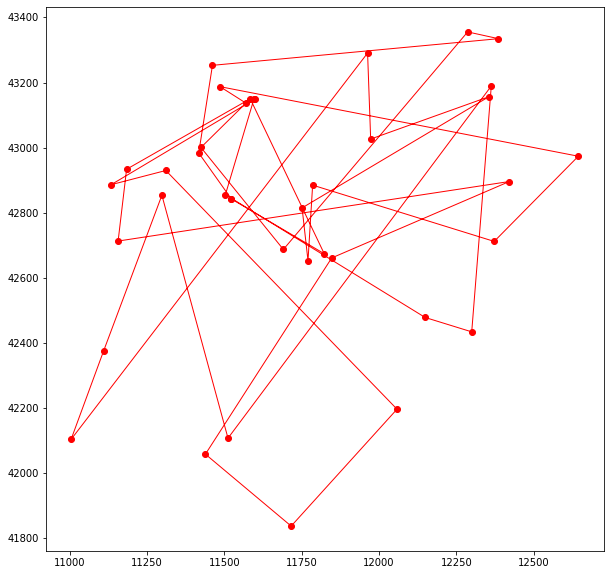

In [26]:
# TSP - Optimised Route
fig = plt.figure(figsize=(10, 10))
plt.plot([dj_cities_coord[best_state[i % cities_cnt]][0] for i in range(cities_cnt+1)], 
         [dj_cities_coord[best_state[i % cities_cnt]][1] for i in range(cities_cnt+1)], 'ro-', linewidth=1)

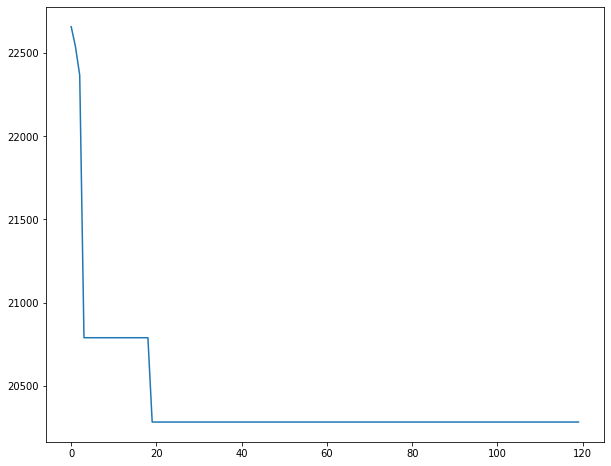

In [27]:
# TSP - convergence curve
fig = plt.figure(figsize=(10, 8))
plt.plot(-(fit_curve))

## Approach2

In [28]:
#To solve Randomised Optimization Algorithm - using the genetic algorithm : 
best_state, best_fitness, fit_curve = mlrose.genetic_alg(problem=problem_fit,
                                                             pop_size=1500,
                                                             mutation_prob=0.2,
                                                             max_attempts=200,
                                                             max_iters=2000,
                                                             curve=True)

In [29]:
print(best_state)

[22 14 21  1  3  5  6 10 26  8  9 28 24 13 20 27  2  4 23 19 36 33 35 37
 34 32 29 31  0 30 11  7 12 16 17 25 15 18]


In [30]:
print(best_fitness)

19109.55459394144


In [76]:
print(fit_curve)

[-21097.70135462 -21097.70135462 -21097.70135462 -21097.70135462
 -21097.70135462 -21097.70135462 -21097.70135462 -21097.70135462
 -21097.70135462 -20736.26408564 -20736.26408564 -20736.26408564
 -20736.26408564 -20736.26408564 -20736.26408564 -20736.26408564
 -20736.26408564 -20736.26408564 -20019.8391355  -20019.8391355
 -20019.8391355  -20019.8391355  -20019.8391355  -20019.8391355
 -20019.8391355  -20019.8391355  -20019.8391355  -20019.8391355
 -20019.8391355  -20019.8391355  -20019.8391355  -20019.8391355
 -20019.8391355  -19513.88946699 -19513.88946699 -19513.88946699
 -19513.88946699 -19513.88946699 -19513.88946699 -19513.88946699
 -19513.88946699 -19513.88946699 -19513.88946699 -19513.88946699
 -19513.88946699 -19513.88946699 -19513.88946699 -19513.88946699
 -19513.88946699 -19513.88946699 -19513.88946699 -19513.88946699
 -19513.88946699 -19513.88946699 -19513.88946699 -19513.88946699
 -19513.88946699 -19513.88946699 -19513.88946699 -19513.88946699
 -19513.88946699 -19513.88946

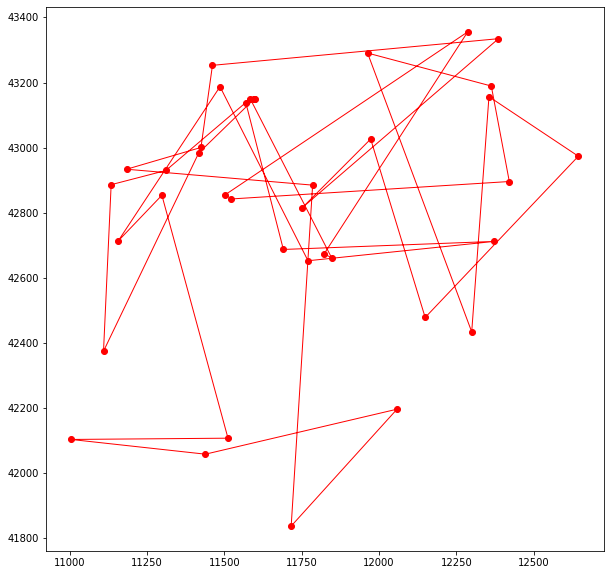

In [77]:
# TSP - Optimised Route
fig = plt.figure(figsize=(10, 10))
plt.plot([dj_cities_coord[best_state[i % cities_cnt]][0] for i in range(cities_cnt+1)], 
         [dj_cities_coord[best_state[i % cities_cnt]][1] for i in range(cities_cnt+1)], 'ro-', linewidth=1)

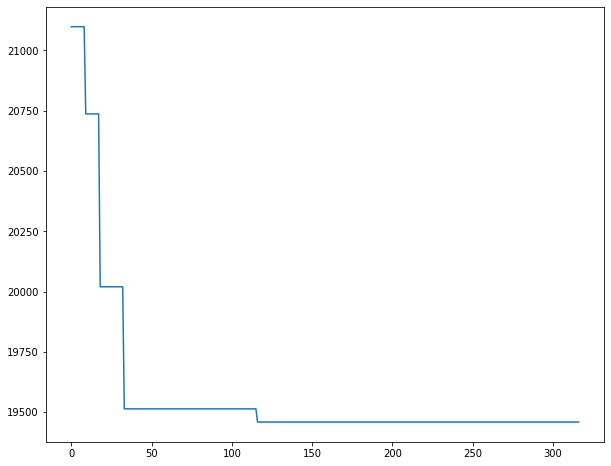

In [78]:
# TSP - convergence curve
fig = plt.figure(figsize=(10, 8))
plt.plot(-(fit_curve))

## Model Conclusion: 

Here we are intending to solve Traveling Salesman Problem Dijibouti 38 cities. There are many approaches, however I have used here Python “mlrose” package to solve this problem. This is efficient package to solve the TSP problem and mainly focus on 
1.fitness function object. 2. optimization problem object. 3. Select and run a randomized optimization algorithm (genetic algorithm)
I have evaluated this model with 2 approaches in the iterations and changing mutation probability along with population size.
Refer below results :
Approach1: pop_size=500,  mutation_prob=0.1, max_attempts=100,  max_iters=1000
The best fitness output is 20281.22
Appraoch2: pop_size=1500,  mutation_prob=0.2, max_attempts=200,  max_iters=2000
The best fitness output is 19109.55
Consequently, the TSP path for Dijibouti 38 cities,  is improved by tuning the parameters in Approach 2 for genetic algorithms Same we can observed that from TSP convergence curve and TSP optimized route chart for approach 2. There is still we have scope to improve this model.
                                        
